In [5]:
import pandas as pd

dau = pd.read_csv("section4-dau.csv", parse_dates=['log_date'])
user_info = pd.read_csv("section4-user_info.csv")
dau.head(5)

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [6]:
user_info.head(5)

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [24]:
# ユーザー情報にアクセス日の情報を付加する
user_info_dau = pd.merge(user_info, dau, on=['app_name', 'user_id'])
# アクセス年月の情報を追加（集計用）
user_info_dau['log_month'] = user_info_dau['log_date'].apply(lambda x: str(x)[0:7])
user_info_dau.head(5)

,install_date,app_name,user_id,gender,generation,device_type,log_date,log_month
0,2013-04-15,game-01,1,M,40,iOS,2013-09-01,2013-09
1,2013-04-15,game-01,1,M,40,iOS,2013-09-02,2013-09
2,2013-04-15,game-01,1,M,40,iOS,2013-09-03,2013-09
3,2013-04-15,game-01,1,M,40,iOS,2013-09-04,2013-09
4,2013-04-15,game-01,1,M,40,iOS,2013-09-05,2013-09


In [25]:
# セグメント分析（性別）
pd.pivot_table(user_info_dau, index=['log_month'], columns=['gender'],  values='user_id',aggfunc=lambda x : len(x))

gender,F,M
log_month,,
2013-08,47343,46842
2013-09,38027,38148


In [26]:
# セグメント分析（年代）
pd.pivot_table(user_info_dau, index=['log_month'], columns=['generation'],  values='user_id',aggfunc=lambda x : len(x))

generation,10,20,30,40,50
log_month,,,,,
2013-08,18785,33671,28072,8828,4829
2013-09,15391,27229,22226,7494,3835


In [27]:
# セグメント分析（性別x年代）
pd.pivot_table(user_info_dau, index=['log_month'], columns=['gender', 'generation'],  values='user_id',aggfunc=lambda x : len(x))

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2013-08     9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013-09     7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

In [30]:
# セグメント分析（デバイス）
pd.pivot_table(user_info_dau, index=['log_month'], columns=['device_type'], values='user_id', aggfunc=lambda x : len(x))

device_type,Android,iOS
log_month,,
2013-08,46974,47211
2013-09,29647,46528


In [41]:
# デバイス別 UU の推移
unique_user_per_device = user_info_dau.groupby(['log_date', 'device_type'])['user_id'].count().unstack()
unique_user_per_device.head(5)

device_type,Android,iOS
log_date,,
2013-08-01,1784,1805
2013-08-02,1386,1451
2013-08-03,1295,1351
2013-08-04,1283,1314
2013-08-05,2002,2038


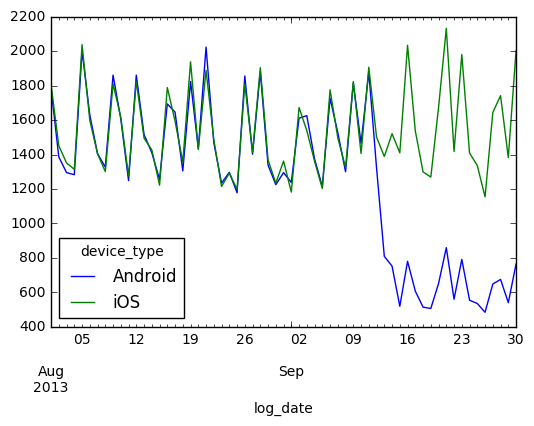

In [43]:
# デバイス別 UU の推移のグラフ
unique_user_per_device.plot()